In [52]:

import cv2
import numpy as np #importe de libreria
from matplotlib import pyplot as plt #pa plotear
from skimage.morphology import (closing,area_closing,area_opening)
from PIL import Image



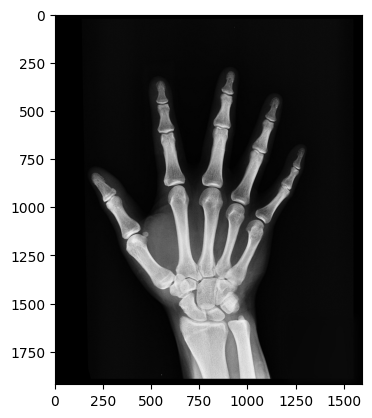

In [53]:
img=Image.open('manox2.png').convert('L')
img=np.array(img)
plt.imshow(img,cmap='gray')

umbral otsu= 87.0


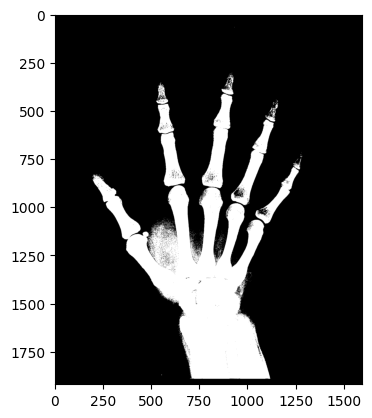

In [54]:
umbral,img_bw=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("umbral otsu=",umbral)
plt.imshow(img_bw,cmap='gray')

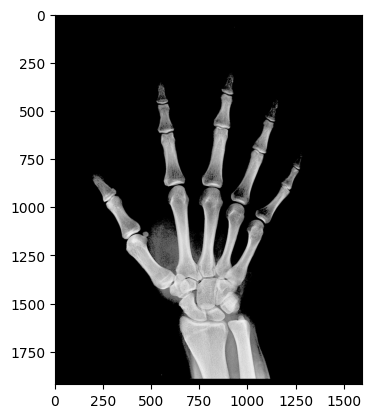

In [55]:
img_seg=cv2.bitwise_and(img,img_bw)
plt.figure()
plt.imshow(img_seg,cmap='gray')

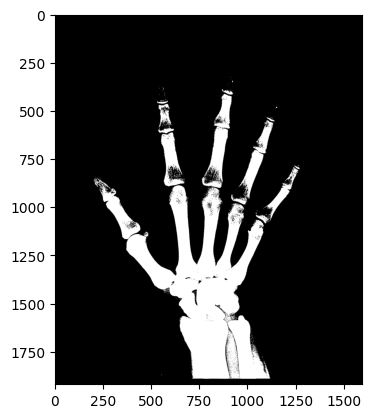

In [56]:
ret2,th2 = cv2.threshold(img_seg,120,255,cv2.THRESH_BINARY)
plt.imshow(th2,cmap='gray')

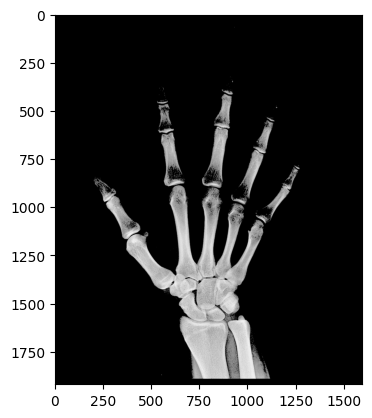

In [57]:

img_seg=cv2.bitwise_and( img,th2)
plt.imshow(img_seg,cmap='gray')

In [58]:
img_norm=(img_seg-np.min(img_seg))/(np.max(img_seg)-np.min(img_seg))
print(img_norm)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


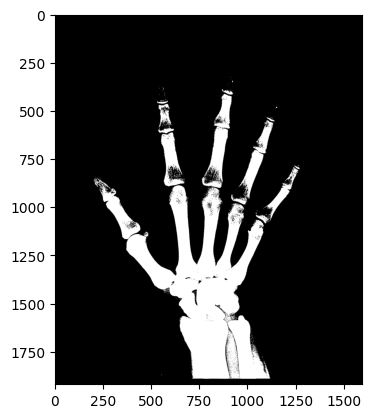

In [59]:
[x,y]=img_norm.shape
mask2=np.copy(img)

for i in range(x):
    for j in range(y):
        if img_norm[i,j]>0.35:
            mask2[i,j]=255
        else:
            mask2[i,j]=0

plt.imshow(mask2,cmap='gray')

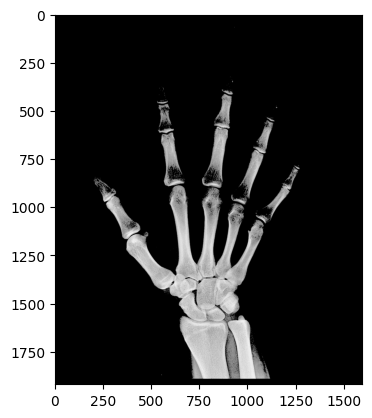

In [60]:

img_mask2=cv2.bitwise_and( img,mask2)
plt.imshow(img_mask2,cmap='gray')

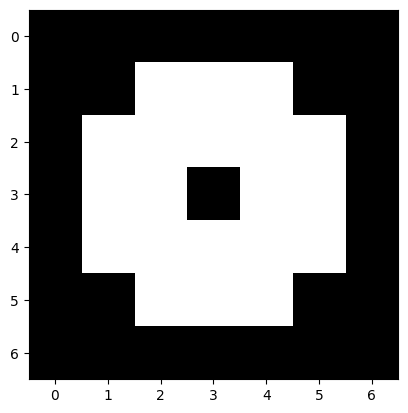

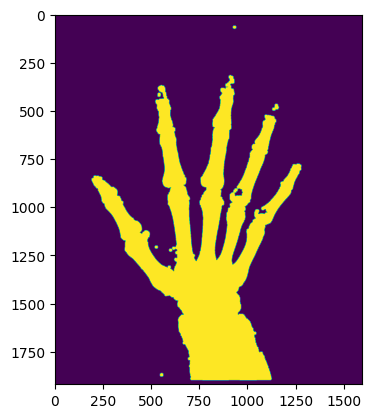

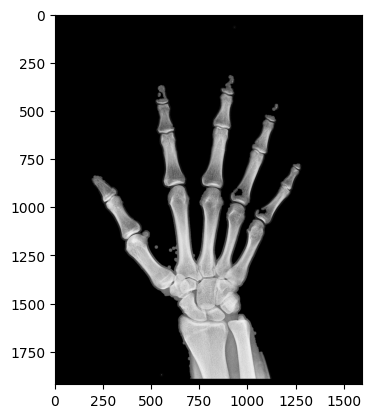

In [72]:
it=4
kernel = np.array(
        [[0, 0, 0, 0, 0,0,0],
       [0, 0, 1, 1,1,0, 0],
       [0, 1, 1, 1,1,1, 0],
       [0, 1, 1,0,1, 1, 0],
       [0, 1, 1, 1,1,1, 0],
       [0, 0, 1,1,1, 0, 0],
       [0, 0, 0,0,0, 0, 0]], np.uint8)

plt.imshow(kernel,cmap='gray')
img2=cv2.dilate(mask2,kernel,iterations=it)

plt.figure()
plt.imshow(img2)
img2=(img2).astype(np.uint8)
img_seg2=cv2.bitwise_and(img,img2)
plt.figure()
plt.imshow(img_seg2,cmap='gray')


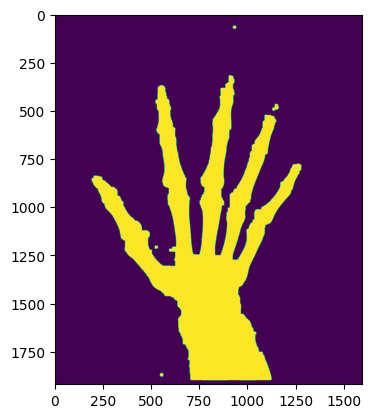

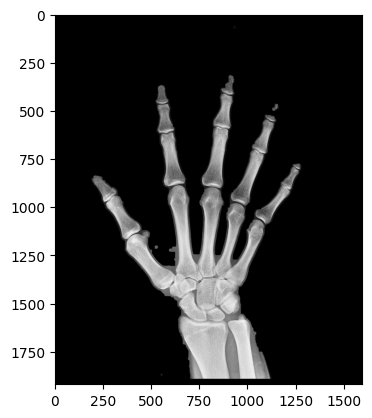

In [77]:
k=25
kernel=np.ones((k,k),np.uint8)
it=5
closed=cv2.morphologyEx(img2,cv2.MORPH_CLOSE,kernel)
plt.imshow(closed)

img_seg2=cv2.bitwise_and(img,closed)
plt.figure()
plt.imshow(img_seg2,cmap='gray')